In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

### Original image

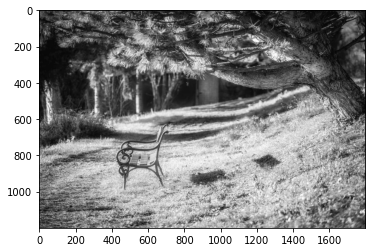

In [3]:
og_img = cv2.imread('Digital watermark\images1\img3.jpg', 0)
og_img_color = cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)
plt.imshow(og_img_color)

### Water Mark

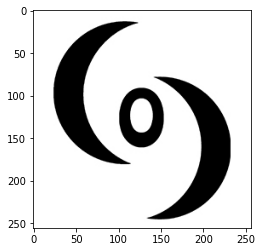

In [4]:
watermark_img = cv2.imread('Digital watermark\images1\watermark.jpg', 0)
watermark_img_color = cv2.cvtColor(watermark_img,cv2.COLOR_BGR2RGB)
plt.imshow(watermark_img_color)

In [5]:
# Functions

In [6]:
IMG_WIDTH = 1200
IMG_HEIGHT = 800
WATERMARK_WIDTH = 256
WATERMARK_HEIGHT = 256

IMG_SIZE = IMG_HEIGHT * IMG_WIDTH
WATERMARK_SIZE = WATERMARK_HEIGHT * WATERMARK_WIDTH

KEY = 564
THRESH = 75

def xor(x ,y):
    if x == 0 and y == 0:
        return 0
    elif x == 0 and y != 0:
        return 255
    elif x != 0 and y == 0:
        return 255
    elif x !=0 and y != 0:
        return 0

def mean_neighbour(img, x, y):
    val = 0
    num = 0
    i = x
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val = val + img[i, j]
        num += 1
    i = x
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    
    return val/float(num)

### Ownership Share Generation

True

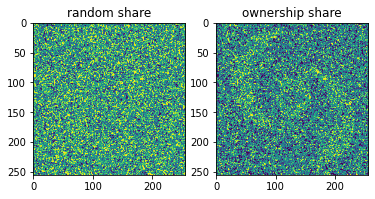

In [7]:
ret,watermark_img = cv2.threshold(watermark_img,127,255,cv2.THRESH_BINARY)

random_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)
owner_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)

random.seed(a=KEY)
random_points = random.sample(range(IMG_SIZE), WATERMARK_SIZE)

i = 0
j = 0

for k in random_points:
    x = k // IMG_WIDTH
    y = k % IMG_WIDTH
    if mean_neighbour(og_img, x, y) > THRESH:
        random_img[i,j] = 255
    j += 1
    if j == 256:
        j = 0
        i += 1

for i in range(0, WATERMARK_HEIGHT):
    for j in range(0, WATERMARK_WIDTH):
        owner_img[i, j] = xor(random_img[i, j], watermark_img[i, j])

plt.subplot(1,2,1)
plt.title('random share')
plt.imshow(random_img)

plt.subplot(1,2,2)
plt.title('ownership share')
plt.imshow(owner_img)

cv2.imwrite('Digital watermark\images1\master_img.jpg', random_img)
cv2.imwrite('Digital watermark\images1\owner_img.jpg', owner_img)

###  Random Share Generation - from modified images

In [8]:
random.seed(a=KEY)
random_points = random.sample(range(IMG_SIZE), WATERMARK_SIZE)

for cnt in range(0, 12):
    og_img = cv2.imread('Digital watermark\images1\modified_images\modified_image_'+str(cnt)+'.jpg',0)
    random_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)

    i = 0
    j = 0

    for k in random_points:
        x = k // IMG_WIDTH
        y = k % IMG_WIDTH
        if mean_neighbour(og_img, x, y) > THRESH:
            random_img[i,j] = 255
        j += 1
        if j == 256:
            j = 0
            i += 1

    cv2.imwrite('Digital watermark\images1\master_images\master_img_'+str(cnt)+'.jpg', random_img)
    #axes[cnt].imshow(master_img)
    print (cnt)

print ("Done")

0
1
2
3
4
5
6
7
8
9
10
11
Done


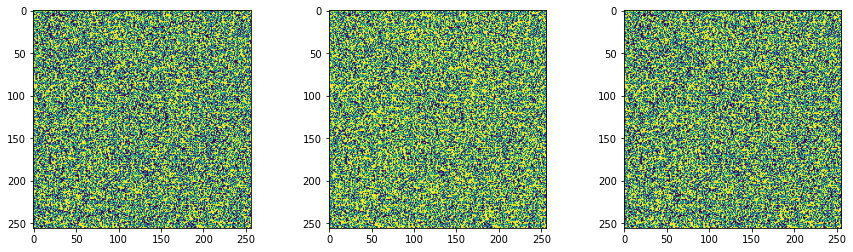

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for cnt in range(0, 3):
    rand_img = cv2.imread('Digital watermark\images1\master_images\master_img_'+str(cnt)+'.jpg',0)
    axes[cnt].imshow(rand_img)    
    

### Watermark Extractor

Done


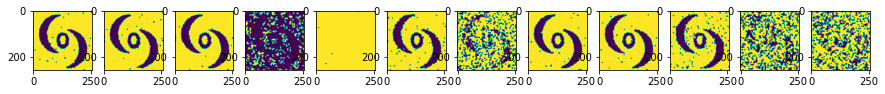

In [11]:
random.seed(a=KEY)
random_points = random.sample(range(IMG_SIZE), WATERMARK_SIZE)

fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 5))
owner_img = cv2.imread('Digital watermark\images1\owner_img.jpg', 0)

for k in range(0, 12):
    rand_img = cv2.imread('Digital watermark\images1\master_images\master_img_'+str(k)+'.jpg', 0)
    watermark_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)

    i = 0
    j = 0

    for i in range(0, WATERMARK_HEIGHT):
        for j in range(0, WATERMARK_WIDTH):
            watermark_img[i, j] = xor(rand_img[i, j], owner_img[i, j])

    watermark_img = (255-watermark_img)
    kernel = np.ones((4,4),np.uint8)
    watermark_img = cv2.medianBlur(watermark_img, 3)
    watermark_img = cv2.morphologyEx(watermark_img, cv2.MORPH_OPEN, kernel)
    watermark_img = cv2.morphologyEx(watermark_img, cv2.MORPH_CLOSE, kernel)
    watermark_img = (255-watermark_img)

    cv2.imwrite(r'C:\Users\sheri\Documents\image processing lab\Digital watermark\images1\regenerated_watermarks\watermark_img_'+str(k)+'.jpg', watermark_img)
    axes[k].imshow(watermark_img)
    #print (k)
print ("Done")

#### Accuracy of extracted watermark 

In [12]:
template = cv2.imread('Digital watermark\images1\watermark.jpg', 0)

for k in range(0, 12):
    img_gray = cv2.imread(r'C:\Users\sheri\Documents\image processing lab\Digital watermark\images1\regenerated_watermarks\watermark_img_'+str(k)+'.jpg', 0)
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)*100
    print(res)


[[87.36569]]
[[87.276634]]
[[87.9528]]
[[22.21512]]
[[-1.8995057]]
[[84.95912]]
[[31.667555]]
[[86.68496]]
[[87.59564]]
[[79.50479]]
[[23.539183]]
[[19.760534]]


In [13]:
template = cv2.imread('Digital watermark\images1\watermark.jpg', 0)

def imageVSwatermark_accuracy(image_index):
    img = cv2.imread(r'C:\Users\sheri\Documents\image processing lab\Digital watermark\images1\modified_images\modified_image_'+str(image_index)+'.jpg', 0)
    img_wm = cv2.imread(r'C:\Users\sheri\Documents\image processing lab\Digital watermark\images1\regenerated_watermarks\watermark_img_'+str(image_index)+'.jpg', 0)

    res = cv2.matchTemplate(img_wm,template,cv2.TM_CCOEFF_NORMED)*100 
    if res[[0]] >70:
        plt.figure(figsize = (10,7))
        plt.subplot(2,2,1)
        plt.imshow(img)
        plt.title('Modified image of the original image')
        plt.axis('off')
    elif res[[0]] <= 70:
        plt.figure(figsize = (10,7))
        plt.subplot(2,2,1)
        plt.imshow(img)
        plt.title('Not related to the original image') 
        plt.axis('off')


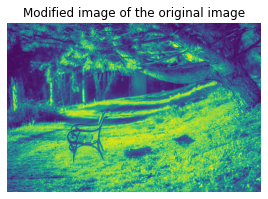

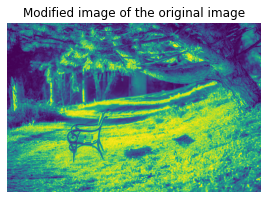

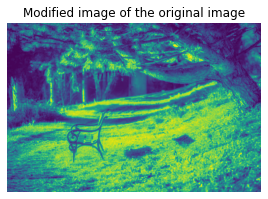

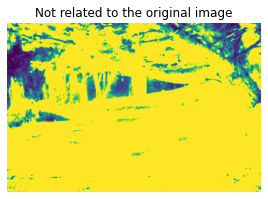

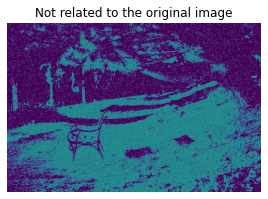

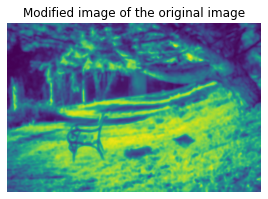

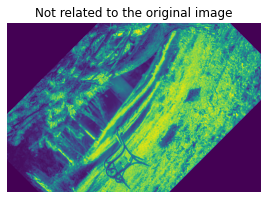

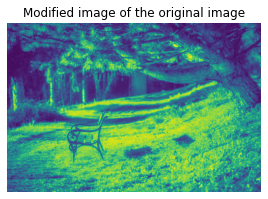

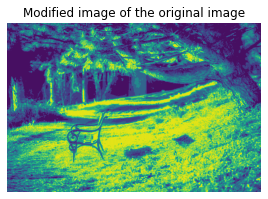

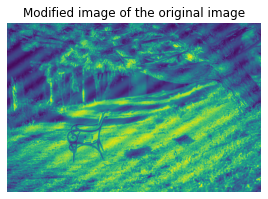

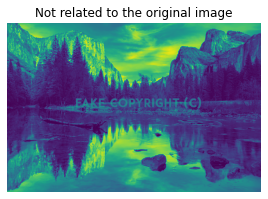

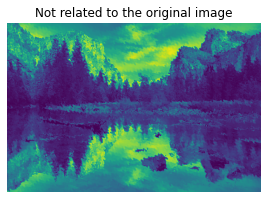

In [14]:
for i in range(0,12):
    imageVSwatermark_accuracy(i)